In [2]:
import pandas as pd
mall_customers = pd.read_csv("C:/Users/Studio14/Downloads/Mall Customers.csv")
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
gender = pd.get_dummies(mall_customers['Gender'])
mall_customers = pd.concat([mall_customers, gender], axis = 1)
mall_customers.drop(['Gender','Female'], axis =1, inplace = True)
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
Male                      200 non-null uint8
dtypes: int64(4), uint8(1)
memory usage: 6.5 KB


In [4]:
import matplotlib.pyplot as plt
x= mall_customers['Annual Income (k$)']
y = mall_customers['Spending Score (1-100)']
plt.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
kmeans.fit(mall_customers)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.inertia_

387065.71377137717

Text(0, 0.5, 'Inertia')

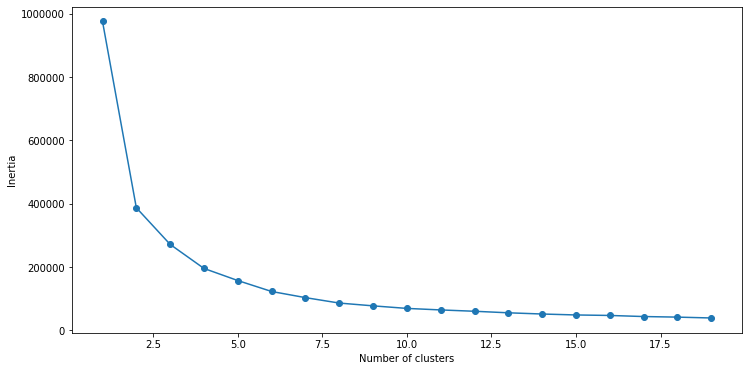

In [7]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(mall_customers)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [8]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 0)
kmeans.fit(mall_customers)
pred = kmeans.predict(mall_customers)

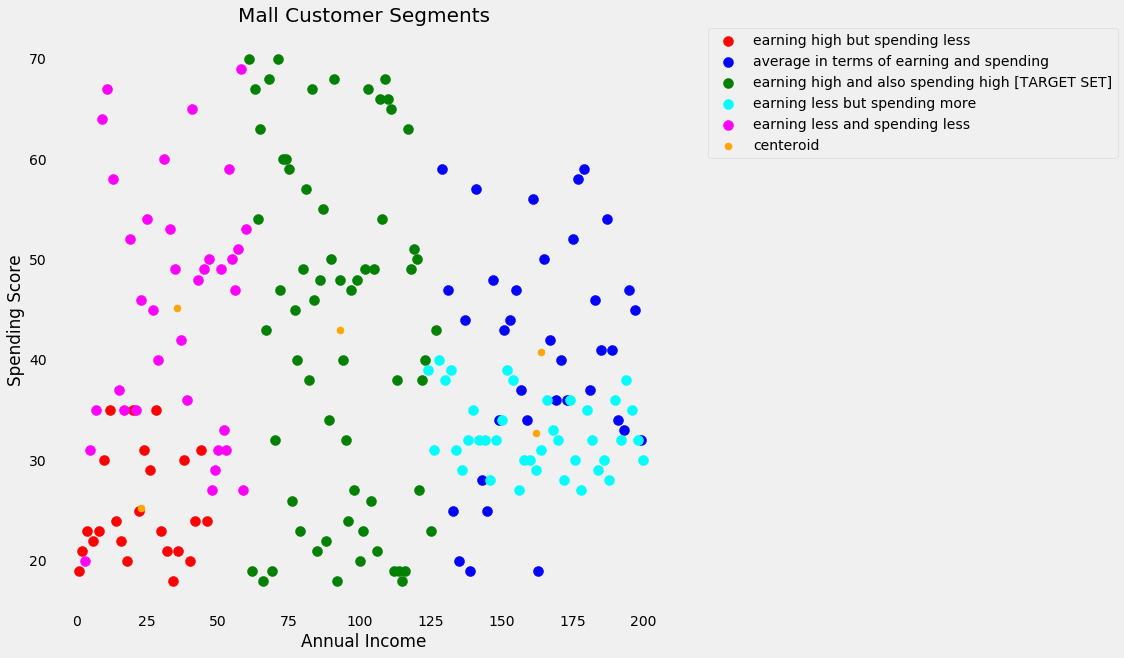

In [13]:
import numpy as np
mall_customers = np.array(mall_customers)
fig=plt.figure(figsize=(10, 10))
plt.scatter(mall_customers[pred == 0, 0], mall_customers[pred == 0, 1], s = 100, c = 'red', label = 'earning high but spending less')
plt.scatter(mall_customers[pred == 1, 0], mall_customers[pred == 1, 1], s = 100, c = 'blue', label = 'average in terms of earning and spending')
plt.scatter(mall_customers[pred == 2, 0], mall_customers[pred == 2, 1], s = 100, c = 'green', label = 'earning high and also spending high [TARGET SET]')
plt.scatter(mall_customers[pred == 3, 0], mall_customers[pred == 3, 1], s = 100, c = 'cyan', label = 'earning less but spending more')
plt.scatter(mall_customers[pred == 4, 0], mall_customers[pred == 4, 1], s = 100, c = 'magenta', label = 'earning less and spending less')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'orange' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Mall Customer Segments', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid()
plt.show()

In [10]:
frame = pd.DataFrame(mall_customers)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    65
3    39
4    36
1    36
0    24
Name: cluster, dtype: int64

The above would indicate that the target cluster should be people who earn a lot and spend a lot. Therefore, businesses should assign the bulk of their marketing budget towards that cluster.